In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.stem import WordNetLemmatizer
from keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from keras.layers import LSTM, Dense, SimpleRNN, Embedding, Flatten, Dropout
from keras.activations import softmax
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"sentiment_tweets3.csv")

In [3]:
df.head()

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [4]:
df.shape

(10314, 3)

In [5]:
df.isnull().sum()

Index                        0
message to examine           0
label (depression result)    0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
#Renaming columns names

df.rename(columns={'message to examine': 'Text', 'label (depression result)': 'Label'}, inplace=True)
df.head()

,Index,Text,Label
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [8]:
df['Text'] = df['Text'].str.lower()

In [9]:
df.head()

,Index,Text,Label
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat need to send 'em to my accountant tomo...,0
4,540,add me on myspace!!! myspace.com/lookthunder,0


In [10]:
def remove_urls(text):
    return re.sub(r'http\S+|www\S+', '', text)

In [11]:
# Apply the function to the 'Text' column
df['Text'] = df['Text'].apply(remove_urls)

In [12]:
df.sample(5)

,Index,Text,Label
2625,269272,well jus got out da shower from a has wastin t...,0
7134,710902,@adorablekat28 no. i think it'll be too small ...,0
28,2853,testing to see if twitter works thro facebook,0
8868,800868,"@honoretiy no not really, i mean ya know depre...",1
9143,801143,daily or regular #physical activity will go a ...,1


In [13]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
# Define the punctuation characters to remove
punctuation = string.punctuation

In [15]:
# Function to remove punctuation from text
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', punctuation))

In [16]:
# Apply remove_punctuation function to 'Text' column
df['Text'] = df['Text'].apply(remove_punctuation)

In [17]:
df.sample(5)

,Index,Text,Label
7562,754610,princessalexis9 up hosted wonderful imaginatio...,0
543,55678,off to the radio station nowanother day,0
8159,800159,mdmarley fuck netflix and chill depression and...,1
8453,800453,we need to educate cis people who are going in...,1
10023,802023,lord please help my friends some of them have ...,1


In [18]:
# Cleaning and removing repeating characters :
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)

In [19]:
df['Text'] = df['Text'].apply(lambda x: cleaning_repeating_char(x))
df['Text'].sample(5)

783     is at home relaxing cant wait too see my besty...
1594    sitting in the sun with a starbucks after a ni...
1178    franco made breakfast for mom here hes trying ...
4482    victoria secret is the most amaaaziiinngg stor...
5555                               loves a follow friday 
Name: Text, dtype: object

In [20]:
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

In [21]:
df['Text'] = df['Text'].apply(remove_numbers)

In [22]:
df.sample(5)

,Index,Text,Label
3942,399414,therealtiffany lol make sure ur drawer spits u...,0
9690,801690,depression came back,1
9795,801795,depression recovery is a long process with ups...,1
9669,801669,exportedsocks idk if ive gone through depressi...,1
5807,580271,fidanza you can never mention that too much,0


In [23]:
stop_words = set(stopwords.words('english'))


In [24]:
# Function to remove stop words from text
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

In [25]:
# Apply remove_stopwords function to 'Text' column
df['Text'] = df['Text'].apply(remove_stopwords)

In [26]:
import emoji

In [27]:
def remove_ej(text):
    return emoji.demojize(text)

In [28]:
df['Text'] = df['Text'].apply(remove_ej)

In [29]:
df.sample(5)

,Index,Text,Label
2498,254598,one perks unemployed enjoying beautiful weathe...,0
7397,738004,andpark million dollars sure cuz everyone love...,0
6416,639266,viktorialove nice like girls pretty toes nails,0
7970,796045,franktrigg heat doesnt get watch crazed disney...,0
6192,616187,fifilacunt french fry tweet,0


In [30]:
# Intilize Lemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [31]:
df['Text_lemmatized'] = df['Text'].apply(lambda x: ' '.join([wordnet_lemmatizer.lemmatize(word , pos='v') for word in x.split()]))

In [32]:
df.drop(["Index"], axis=1, inplace = True)

In [33]:
X = df['Text']
y = df['Label']

In [34]:
X_train,X_test,y_train,y_test=train_test_split(df['Text_lemmatized'],df['Label'],test_size=0.20,random_state=42)

In [35]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((8251,), (2063,), (8251,), (2063,))

In [36]:
tokenizer = Tokenizer(oov_token = 'nothing')
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)

In [37]:
tokenizer.document_count

10314

In [38]:
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [39]:
maxlen = max(len(tokens) for tokens in X_train_sequences)
print("Maximum sequence length (maxlen):", maxlen)

Maximum sequence length (maxlen): 72


In [40]:
# Perform padding on X_train and X_test sequences
X_train_padded = pad_sequences(X_train_sequences, maxlen=maxlen, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=maxlen, padding='post')

In [41]:
# Print the padded sequences for X_train and X_test
print("X_train_padded:")
print(X_train_padded)
print("\nX_test_padded:")
print(X_test_padded)

X_train_padded:
[[   17   375   900 ...     0     0     0]
 [    5  3524   501 ...     0     0     0]
 [ 5409  5410     3 ...     0     0     0]
 ...
 [17129   923     0 ...     0     0     0]
 [  279  1684  3150 ...     0     0     0]
 [  433     5  1050 ...     0     0     0]]

X_test_padded:
[[17130   378   143 ...     0     0     0]
 [17131   704   205 ...     0     0     0]
 [17132    94   116 ...     0     0     0]
 ...
 [20072 20073 20074 ...     0     0     0]
 [20075   213    73 ...     0     0     0]
 [20076   628   801 ...     0     0     0]]


In [42]:
y_test.value_counts()

Label
0    1614
1     449
Name: count, dtype: int64

In [43]:
y_train.value_counts()

Label
0    6386
1    1865
Name: count, dtype: int64

In [44]:
# Embedding Input Size / Vocabulary Size 
input_Size = np.max(X_train_padded) + 1
input_Size

np.int32(17130)

In [45]:
# Define the model
model = Sequential()

model.add(LSTM(128, input_shape=(75,1), return_sequences=True))  

model.add(Dropout(0.5))

model.add(LSTM(128)) 

model.add(Dropout(0.5))  

model.add(Dense(64, activation='relu'))  

model.add(Dense(1, activation='sigmoid')) 

In [46]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [47]:
# Model Train 
history = model.fit(X_train_padded, y_train, epochs=15, batch_size=32, validation_data=(X_test_padded, y_test))

Epoch 1/15
258/258 ━━━━━━━━━━━━━━━━━━━━ 38s 130ms/step - accuracy: 0.8081 - loss: 0.5024 - val_accuracy: 0.8328 - val_loss: 0.4417
Epoch 2/15
258/258 ━━━━━━━━━━━━━━━━━━━━ 34s 131ms/step - accuracy: 0.8199 - loss: 0.4623 - val_accuracy: 0.8352 - val_loss: 0.4289
Epoch 3/15
258/258 ━━━━━━━━━━━━━━━━━━━━ 34s 130ms/step - accuracy: 0.8371 - loss: 0.4312 - val_accuracy: 0.8987 - val_loss: 0.2919
Epoch 4/15
258/258 ━━━━━━━━━━━━━━━━━━━━ 33s 129ms/step - accuracy: 0.8991 - loss: 0.2907 - val_accuracy: 0.9355 - val_loss: 0.2163
Epoch 5/15
258/258 ━━━━━━━━━━━━━━━━━━━━ 34s 132ms/step - accuracy: 0.9408 - loss: 0.1982 - val_accuracy: 0.9583 - val_loss: 0.1557
Epoch 6/15
258/258 ━━━━━━━━━━━━━━━━━━━━ 34s 133ms/step - accuracy: 0.9621 - loss: 0.1499 - val_accuracy: 0.9578 - val_loss: 0.1555
Epoch 7/15
258/258 ━━━━━━━━━━━━━━━━━━━━ 35s 135ms/step - accuracy: 0.9609 - loss: 0.1490 - val_accuracy: 0.9690 - val_loss: 0.1239
Epoch 8/15
258/258 ━━━━━━━━━━━━━━━━━━━━ 34s 133ms/step - accuracy: 0.9616 - loss: 0

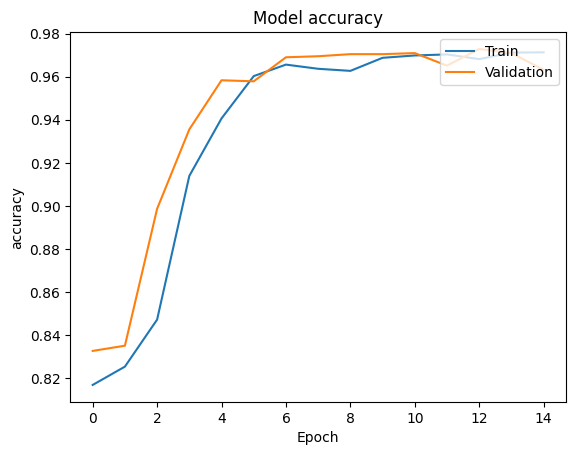

In [48]:
# Plotting the training and testing accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

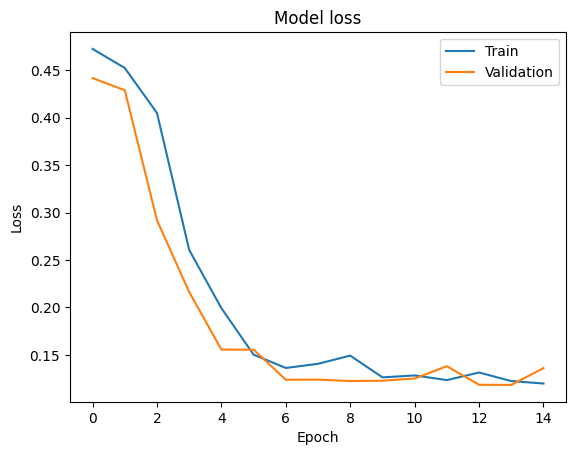

In [49]:
# Plotting the training and testing loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [81]:
predicted_labels = model.predict(X_test_padded)
predicted_labels = (predicted_labels > 0.5).astype(int) 
report = classification_report(y_test, predicted_labels, target_names=['0', '1'])
print(report)

65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1614
           1       0.94      0.89      0.91       449

    accuracy                           0.96      2063
   macro avg       0.95      0.94      0.94      2063
weighted avg       0.96      0.96      0.96      2063



In [61]:
def predict_sentiment(text):
    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=maxlen, padding='post')
    prediction = model.predict(padded)[0]
    #sentiment = np.where(prediction >= 0.5, "Positive", "Negative")
    sentiment = "Positive" if prediction >= 0.5 else "Negative"
    return sentiment

In [62]:
text1 = "The lack of this understanding is a small but significant part of what causes anxiety & depression to both feel so incredibly lonely."

In [63]:
predict_sentiment(text1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


'Positive'

In [69]:
text2 = "Im miserable but not the type that wants company Im the type that whats to be left alone Maybe thats depression"

In [70]:
predict_sentiment(text2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


'Positive'

In [74]:
text3 = "absolutely loved this movie the story was gripping and the performances were top-notch"
predict_sentiment(text3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


'Negative'

In [76]:
text4 = "i am very happy today lets go on a road trip"
predict_sentiment(text4)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


'Negative'

In [78]:
text5 = "Depression. Everybody I know is suffering from the depression. What a great life!"
predict_sentiment(text5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


'Positive'